# Analisis Sentimen Ulasan Aplikasi Qara'a di google play store Menggunakan Metode Klasifikasi Algoritma Naive Bayes

Nama:
Imam Fiqri Mujadid

# Scraping data

In [ ]:
# Menggunakan library google-play-scraper untuk mengambil ulasan aplikasi Qara'a dari Google Play Store.
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00


# Impor Library yang diperlukan

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bismillah.amaljariyah',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi gojek yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=42000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None
# kemudian di filter_score kita gunakan None untuk mengambil semua score atau rating bintang 1 sampai 5
)

In [ ]:
# Membuat DataFrame dari hasil scraping dengan kolom 'review'
df_data = pd.DataFrame(np.array(result),columns=['review'])
# Menggabungkan DataFrame df_data dengan DataFrame yang dibuat dari kolom 'review'
df_data = df_data.join(pd.DataFrame(df_data.pop('review').tolist()))
df_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f65fb38f-de78-41a9-ad11-d4e513f37b29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"masyaallah, dengan desain grafisnya yang sanga...",5,4,5.1.14,2024-08-27 18:40:46,"Wah, makasih banyak, kak! 🙏 Senang banget kala...",2024-09-02 02:18:05,5.1.14
1,9da0f651-e15c-4117-9c4b-abafca5f4daa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Alhamdulilahh sangat membantu untuk kegiatan i...,4,0,5.1.14,2024-09-18 22:36:33,"Assalamu'alaikum kak, maaf ya kak kalau jadi r...",2024-09-19 07:20:35,5.1.14
2,1e578763-57c5-45e9-9305-69d3fc57391d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dari saya sendiri aplikasinya sudah bagus, tam...",4,1,5.1.11,2024-06-01 09:04:29,"Assalamu'alaikum Kak,\nTerima kasih banyak ata...",2024-06-04 02:28:56,5.1.11
3,8cad7e42-bf1b-4fd8-9607-3fdde18650e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini kenapa selesai mengerjakan ujian belum lih...,5,0,5.1.14,2024-10-26 15:27:35,None,NaT,5.1.14
4,52f46097-455c-434f-969f-e7fe5ec4b3a7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,0,None,2024-10-15 05:59:24,"Alhamdulillah, terima kasih banyak atas masuka...",2024-10-18 07:23:14,None


In [ ]:
 # kemudian hitung kembali berapa jumlah data yg didapatkan
len(df_data.index)

9937

In [ ]:
# Memilih beberapa kolom tertentu ('userName', 'score', 'at', 'content') dari DataFrame
df_data[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,5,2024-08-27 18:40:46,"masyaallah, dengan desain grafisnya yang sanga..."
1,Pengguna Google,4,2024-09-18 22:36:33,Alhamdulilahh sangat membantu untuk kegiatan i...
2,Pengguna Google,4,2024-06-01 09:04:29,"Dari saya sendiri aplikasinya sudah bagus, tam..."
3,Pengguna Google,5,2024-10-26 15:27:35,Ini kenapa selesai mengerjakan ujian belum lih...
4,Pengguna Google,4,2024-10-15 05:59:24,"Untuk aplikasinya bagus, Alhamdulillahnya jadi..."


In [ ]:
#mengurutkan data berdasarkan tanggal ulasan

new_df = df_data[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
3,Pengguna Google,5,2024-10-26 15:27:35,Ini kenapa selesai mengerjakan ujian belum lih...
65,Pengguna Google,5,2024-10-16 13:00:14,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...
4,Pengguna Google,4,2024-10-15 05:59:24,"Untuk aplikasinya bagus, Alhamdulillahnya jadi..."
6345,Pengguna Google,5,2024-10-14 23:17:16,bagus
2148,Pengguna Google,1,2024-10-09 06:09:33,Sayang sekali berbayar


In [ ]:
#kemudian kita simpan ke dataframe baru my_df dan memilih kolom tertentu
my_df = sorted_df[['userName', 'score','at', 'content']]

In [ ]:
#memfilter sehingga dibutuhkan hanya kolom content dan score
my_df=my_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score
# maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [ ]:
#menampilkan 5 data teratas dari data yang sudah difilter
my_df.head()

,content,score
3,Ini kenapa selesai mengerjakan ujian belum lih...,5
65,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5
4,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4
6345,bagus,5
2148,Sayang sekali berbayar,1


# PELABELAN

In [ ]:
#Menambahkan kolom 'Label' berdasarkan nilai 'score'.
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
# Mengaplikasikan fungsi pelabelan pada kolom 'score'
# dan menyimpan hasilnya dalam kolom 'Label'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
3,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif
65,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif
4,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif
6345,bagus,5,Positif
2148,Sayang sekali berbayar,1,Negatif
5911,Baru mulai mencoba,5,Positif
6347,qara'a mantapp,5,Positif
9521,Bagus,5,Positif
606,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif
6348,good aplication,5,Positif


In [ ]:
#Menyimpan data yang sudah diolah ke dalam file CSV.
my_df.to_csv("scrapped_data_qara.a.csv", index = False)

# Pembersihan data
# data cleaning

In [ ]:
#menampilkan scrapping data gojek csv
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('scrapped_data_qara.a.csv')
my_df.head(50)

,content,score,Label
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif
3,bagus,5,Positif
4,Sayang sekali berbayar,1,Negatif
5,Baru mulai mencoba,5,Positif
6,qara'a mantapp,5,Positif
7,Bagus,5,Positif
8,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif
9,good aplication,5,Positif


In [ ]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9937 entries, 0 to 9936
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9937 non-null   object
 1   score    9937 non-null   int64 
 2   Label    9937 non-null   object
dtypes: int64(1), object(2)
memory usage: 233.0+ KB


In [ ]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9932,False,False,False
9933,False,False,False
9934,False,False,False
9935,False,False,False


In [ ]:
# mengecek apakah ada nilai null (NaN) di setiap kolom DataFrame
# pada label "True" bahwa terdapat nilai Nan
my_df.isna().any()

,0
content,False
score,False
Label,False


In [ ]:
#menghasilkan statistik deskriptif
# sehingga memberikan gambaran umum tentang distribusi rating dalam dataset
my_df.describe()

,score
count,9937.000000
mean,4.624233
std,0.953471
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

,0
content,0
score,0
Label,0


# 1. Handling Missing value-Ignore tuple


In [ ]:
#Mengatasi nilai kosong pada kolom 'Label'.
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
#menghitung jumlah nilai null
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [ ]:
#menampilkan data yang telah diolah jumlah nullnya
my_df.head(50)

,content,score,Label
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif
3,bagus,5,Positif
4,Sayang sekali berbayar,1,Negatif
5,Baru mulai mencoba,5,Positif
6,qara'a mantapp,5,Positif
7,Bagus,5,Positif
8,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif
9,good aplication,5,Positif


In [ ]:
 #simpan hasil file data cleaning dengan nama Qara.a_preprocessing.csv
my_df.to_csv("qara.a_preprocessing.csv", index = False)

# Text PreProcessing

In [ ]:
import pandas as pd
#memuat file csv dari hasil data preprocesing
df = pd.read_csv('/content/qara.a_preprocessing.csv')
df.head(50)

,content,score,Label
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif
3,bagus,5,Positif
4,Sayang sekali berbayar,1,Negatif
5,Baru mulai mencoba,5,Positif
6,qara'a mantapp,5,Positif
7,Bagus,5,Positif
8,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif
9,good aplication,5,Positif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
  # Mengonversi teks ke huruf kecil
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    # Menghapus karakter-karakter tertentu menggunakan regular expression
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
     # Menghapus angka
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
# Mengonversi teks 'content' ke huruf kecil
# dan menyimpannya dalam kolom baru 'text_clean'
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
# Memanggil fungsi clean_text untuk membersihkan teks pada kolom 'content'
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif,ini kenapa selesai mengerjakan ujian belum lih...
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif,masyaallah aplikasi ini memang lah tebaik bagi...
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif,untuk aplikasinya bagus alhamdulillahnya jadi ...
3,bagus,5,Positif,bagus
4,Sayang sekali berbayar,1,Negatif,sayang sekali berbayar
5,Baru mulai mencoba,5,Positif,baru mulai mencoba
6,qara'a mantapp,5,Positif,qaraa mantapp
7,Bagus,5,Positif,bagus
8,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif,tidak ada notifikasisuara azan
9,good aplication,5,Positif,good aplication


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# Mengunduh daftar stop words untuk bahasa Indonesia dari NLTK
stop = stopwords.words('indonesian')
# Mengaplikasikan penghapusan stop words pada teks yang sudah dibersihkan ('text_clean')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score,Label,text_clean,text_StopWord
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif,ini kenapa selesai mengerjakan ujian belum lih...,selesai ujian lihat hasilnya aplikasi eror gak...
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif,masyaallah aplikasi ini memang lah tebaik bagi...,masyaallah aplikasi tebaik terbantu mudah paha...
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif,untuk aplikasinya bagus alhamdulillahnya jadi ...,aplikasinya bagus alhamdulillahnya belajar qur...
3,bagus,5,Positif,bagus,bagus
4,Sayang sekali berbayar,1,Negatif,sayang sekali berbayar,sayang berbayar
5,Baru mulai mencoba,5,Positif,baru mulai mencoba,mencoba
6,qara'a mantapp,5,Positif,qaraa mantapp,qaraa mantapp
7,Bagus,5,Positif,bagus,bagus
8,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif,tidak ada notifikasisuara azan,notifikasisuara azan
9,good aplication,5,Positif,good aplication,good aplication


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
# Mengaplikasikan tokenisasi kata pada teks yang sudah dibersihkan
# dan dihapus stop words ('text_StopWord')
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif,ini kenapa selesai mengerjakan ujian belum lih...,selesai ujian lihat hasilnya aplikasi eror gak...,"[selesai, ujian, lihat, hasilnya, aplikasi, er..."
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif,masyaallah aplikasi ini memang lah tebaik bagi...,masyaallah aplikasi tebaik terbantu mudah paha...,"[masyaallah, aplikasi, tebaik, terbantu, mudah..."
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif,untuk aplikasinya bagus alhamdulillahnya jadi ...,aplikasinya bagus alhamdulillahnya belajar qur...,"[aplikasinya, bagus, alhamdulillahnya, belajar..."
3,bagus,5,Positif,bagus,bagus,[bagus]
4,Sayang sekali berbayar,1,Negatif,sayang sekali berbayar,sayang berbayar,"[sayang, berbayar]"


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
# library sastrawi
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Membuat objek factory untuk Stemmer
factory = StemmerFactory()
# Membuat objek stemmer menggunakan factory
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------#
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


# Membuat objek factory untuk Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada suatu term
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Membuat kamus (dictionary) kosong untuk menyimpan term yang sudah di-stem
term_dict = {}
hitung=0

# Iterasi melalui setiap term dalam kamus dan melakukan stemming
for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Menampilkan kamus yang berisi term yang sudah di-stem
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# Fungsi untuk menerapkan stemming pada dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


# Membuat kolom baru 'text_steamindo' yang berisi kata-kata yang sudah di-stem
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

Output streaming akan dipotong hingga 5000 baris terakhir.
3022 : membantuku : bantu
3023 : mengapal : kapal
3024 : hafiz : hafiz
3025 : kegunaan : guna
3026 : subahanallahaplikasi : subahanallahaplikasi
3027 : sempurnadari : sempurnadari
3028 : seluru : seluru
3029 : keselamatan : selamat
3030 : fotyr : fotyr
3031 : gratiseskipun : gratiseskipun
3032 : nnton : nnton
3033 : iklaniklan : iklaniklan
3034 : memebantu : bantu
3035 : yng : yng
3036 : lindungi : lindung
3037 : terganggu : ganggu
3038 : berati : berat
3039 : disitu : situ
3040 : mashaa : mashaa
3041 : tabrakulloh : tabrakulloh
3042 : jazzakallah : jazzakallah
3043 : pliss : pliss
3044 : home : home
3045 : pengaturanhapus : pengaturanhapus
3046 : kinerja : kerja
3047 : referensikan : referensi
3048 : dibandingkan : banding
3049 : sasarannya : sasar
3050 : jaman : jaman
3051 : now : now
3052 : stelah : stelah
3053 : perbaharua : perbaharua
3054 : lmot : lmot
3055 : sblum : sblum
3056 : nua : nua
3057 : memperkaya : kaya
3058 : 

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Ini kenapa selesai mengerjakan ujian belum lih...,5,Positif,ini kenapa selesai mengerjakan ujian belum lih...,selesai ujian lihat hasilnya aplikasi eror gak...,"[selesai, ujian, lihat, hasilnya, aplikasi, er...",selesai uji lihat hasil aplikasi eror gak tolo...
1,MASYAALLAH APLIKASI INI MEMANG LAH TEBAIK BAGI...,5,Positif,masyaallah aplikasi ini memang lah tebaik bagi...,masyaallah aplikasi tebaik terbantu mudah paha...,"[masyaallah, aplikasi, tebaik, terbantu, mudah...",masyaallah aplikasi tebaik bantu mudah paham m...
2,"Untuk aplikasinya bagus, Alhamdulillahnya jadi...",4,Positif,untuk aplikasinya bagus alhamdulillahnya jadi ...,aplikasinya bagus alhamdulillahnya belajar qur...,"[aplikasinya, bagus, alhamdulillahnya, belajar...",aplikasi bagus alhamdulillah ajar quran fitur ...
3,bagus,5,Positif,bagus,bagus,[bagus],bagus
4,Sayang sekali berbayar,1,Negatif,sayang sekali berbayar,sayang berbayar,"[sayang, berbayar]",sayang bayar
5,Baru mulai mencoba,5,Positif,baru mulai mencoba,mencoba,[mencoba],coba
6,qara'a mantapp,5,Positif,qaraa mantapp,qaraa mantapp,"[qaraa, mantapp]",qaraa mantapp
7,Bagus,5,Positif,bagus,bagus,[bagus],bagus
8,tidak ada notifikasi/suara azan🙏🏻🙏🏻,1,Negatif,tidak ada notifikasisuara azan,notifikasisuara azan,"[notifikasisuara, azan]",notifikasisuara azan
9,good aplication,5,Positif,good aplication,good aplication,"[good, aplication]",good aplication


In [ ]:
#kemudian simpan hasil text preprocessing ke file csv
data_clean.to_csv('Hasil_TextPreProcessing_qara.a.csv', index= False)

In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

# Spliting data

memecah data test 20% dari keseluruhan data

In [ ]:
# Memisahkan data menjadi data latih dan data uji
# dalam hal ini, kolom 'content',
# Label yang ingin diprediksi kolom 'Label' dari data_clean
# proporsi data uji dalam hal ini 20%
# dan seed untuk membuat pembagian data konsisten ketika dijalankan
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Melakukan fitting dan transformasi pada data latih
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# Melakukan transformasi pada data uji menggunakan kosakata
# yang telah dipelajari dari data latih
tfidf_test = tfidf_vectorizer.transform(X_test)


In [ ]:
# Mencetak dimensi dari matriks representasi vektor bag-of-words
# untuk data latih dan data uji
print(X_train.shape)
print(y_train.shape)
# menampilkan dimensi dari vektor label untuk data latih dan data uji
print(X_test.shape)
print(y_test.shape)

(7949,)
(7949,)
(1988,)
(1988,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()
# Melakukan fitting pada data latih
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
# Melakukan transformasi teks latih menjadi vektor bag-of-words
X_train = vectorizer.transform(X_train)
# Melakukan transformasi teks uji menjadi vektor bag-of-words
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model klasifikasi Naive Bayes dengan algoritma multinomial
nb = MultinomialNB()
# Melatih model dengan data latih (representasi TF-IDF)
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
# Mengonversi representasi data latih (X_train) dari bentuk sparse matrix ke array
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Melakukan prediksi pada data uji menggunakan model klasifikasi Naive Bayes
y_pred = nb.predict(tfidf_test)

# Evaluate Model

In [ ]:
# Menghitung akurasi dengan membandingkan label yang sebenarnya (y_test)
# dengan hasil prediksi (y_pred)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Menggunakan Multinomial Naive Bayes untuk Klasifikasi Sentimen
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Inisialisasi model klasifikasi Multinomial Naive Bayes
clf = MultinomialNB()
# Melatih model dengan data training
clf.fit(X_train, y_train)
# Melakukan prediksi menggunakan data testing
predicted = clf.predict(X_test)

# Menghitung dan akan menampilkan metrik evaluasi model
print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="weighted", pos_label="Negatif")) # Changed average to 'weighted'
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="weighted", pos_label="Negatif")) # Changed average to 'weighted'
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="weighted", pos_label="Negatif")) # Changed average to 'weighted'

# menampilkan classification report
print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
# menampilkan confusion matrix
print(classification_report(y_test, predicted, zero_division=0))

# menyimpan dataset yang sudah di-preprocessing
data_clean = pd.read_csv('Hasil_TextPreProcessing_qara.a.csv')

MultinomialNB Accuracy: 0.9074446680080482
MultinomialNB Precision: 0.8732147359240104
MultinomialNB Recall: 0.9074446680080482
MultinomialNB f1_score: 0.889849553371682
confusion_matrix:
 [[  52    3   63]
 [  20    0   57]
 [  34    7 1752]]

              precision    recall  f1-score   support

     Negatif       0.49      0.44      0.46       118
      Netral       0.00      0.00      0.00        77
     Positif       0.94      0.98      0.96      1793

    accuracy                           0.91      1988
   macro avg       0.48      0.47      0.47      1988
weighted avg       0.87      0.91      0.89      1988



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Negatif') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Negatif') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 'Negatif') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghasilkan confusion matrix dari hasil prediksi dan label sebenarnya
cm = confusion_matrix(y_test, predicted)

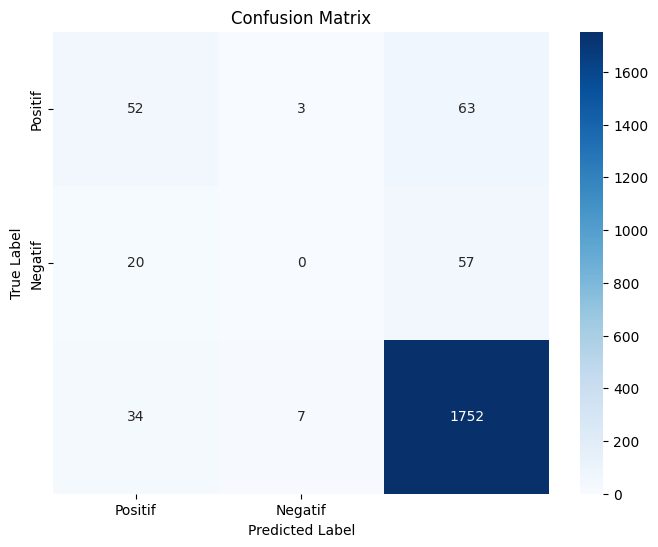

In [ ]:
# Membuat heatmap untuk confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positif", "Negatif"], yticklabels=["Positif", "Negatif"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

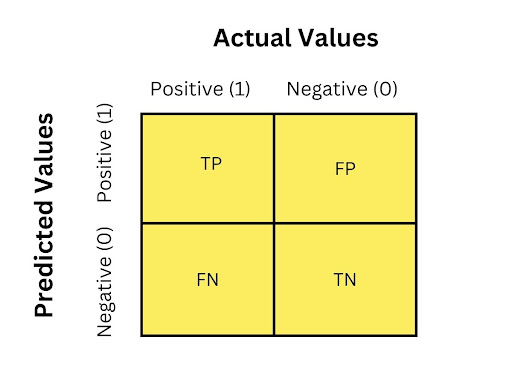

Berdasarkan coefisien matriks, model klasifikasi tersebut memprediksi 147 True positif dengan benar, 2 False positif negatif dengan salah diprediksi positif, 24 false negatif negatif dengan benar, dan 7 True Negatif positif dengan salah diprediksi negatif.
